In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data =pd.read_excel("Data_Train.Xlsx")
test_data =pd.read_excel("Test_set.Xlsx")


In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_data.tiil()

AttributeError: 'DataFrame' object has no attribute 'tiil'

In [4]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
print(len(train_data))
print(len(test_data))

10683
2671


In [6]:
big_data =train_data.append(test_data)
len(big_data)

13354

In [7]:
big_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [8]:
len(big_data["Airline"])

13354

In [9]:
big_data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [344]:
##Feature Engineering

In [10]:
big_data["Date"] =big_data["Date_of_Journey"].str.split("/").str[0]
big_data["Month"] =big_data["Date_of_Journey"].str.split("/").str[1]
big_data["Year"] =big_data["Date_of_Journey"].str.split("/").str[2]

In [11]:
big_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [12]:
big_data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [13]:
big_data["Data"] =big_data["Date"].astype(int)
big_data["Month"] =big_data["Month"].astype(int)
big_data["Year"] =big_data["Year"].astype(int)

In [14]:
big_data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month                int32
Year                 int32
Data                 int32
dtype: object

In [15]:
big_data =big_data.drop(["Date_of_Journey"],axis =1)

In [16]:
big_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Data
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,3,2019,1


In [17]:
big_data["Arrival_Time"] =big_data["Arrival_Time"].str.split(" ").str[0]

In [18]:
big_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Data
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,3,2019,1


In [19]:
big_data["Arrival_Hour"] =big_data["Arrival_Time"].str.split(":").str[0]
big_data["Arrival_Minute"] =big_data["Arrival_Time"].str.split(":").str[1]

In [21]:
big_data["Arrival_Hour"] =big_data["Arrival_Hour"].astype(int)
big_data["Arrival_Minute"] =big_data["Arrival_Minute"].astype(int)

In [22]:
big_data =big_data.drop(["Arrival_Time"],axis =1)

In [23]:
big_data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Data,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,24,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,1,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,12,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,01,3,2019,1,21,35


In [24]:
big_data["Dep_Hour"] =big_data["Dep_Time"].str.split(":").str[0]
big_data["Dep_Minute"] =big_data["Dep_Time"].str.split(":").str[1]

In [25]:
big_data["Dep_Hour"] =big_data["Dep_Hour"].astype(int)
big_data["Dep_Minute"] =big_data["Dep_Minute"].astype(int)
big_data =big_data.drop(["Dep_Time"],axis =1)

In [26]:
big_data["Duration_Hour"] =big_data["Duration"].str.split(" ").str[0]
big_data["Duration_Minute"] =big_data["Duration"].str.split(" ").str[1]

In [27]:
big_data =big_data.drop(["Duration"],axis =1)

In [28]:
big_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Data,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,2019,24,1,10,22,20,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,2019,1,13,15,5,50,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9,6,2019,9,4,25,9,25,19h,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12,5,2019,12,23,30,18,5,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,01,3,2019,1,21,35,16,50,4h,45m


In [29]:
big_data["Duration_Hour"] =big_data["Duration_Hour"].str.split("h").str[0]
big_data["Duration_Minute"] =big_data["Duration_Minute"].str.split("m").str[0]

In [30]:
big_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Data,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,2019,24,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,2019,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9,6,2019,9,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12,5,2019,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,01,3,2019,1,21,35,16,50,4,45


In [31]:
big_data[big_data["Total_Stops"].isnull()]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Data,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7480.0,6,5,2019,6,9,25,9,45,23,40


In [32]:
big_data["Total_Stops"] =big_data["Total_Stops"].fillna("1 stop")

In [33]:
big_data["Total_Stops"].isnull().sum()

0

In [34]:
big_data["Total_Stops"] =big_data["Total_Stops"].replace("non-stop","0 stop")

In [35]:
big_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Data,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0 stop,No info,3897.0,24,3,2019,24,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,2019,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9,6,2019,9,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12,5,2019,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,01,3,2019,1,21,35,16,50,4,45


In [36]:
big_data["Total_Stops"] =big_data["Total_Stops"].str.split(" ").str[0]

In [38]:
big_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Data,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.0,24,3,2019,24,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.0,1,5,2019,1,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882.0,9,6,2019,9,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218.0,12,5,2019,12,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302.0,01,3,2019,1,21,35,16,50,4,45


In [39]:
big_data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month                int32
Year                 int32
Data                 int32
Arrival_Hour         int32
Arrival_Minute       int32
Dep_Hour             int32
Dep_Minute           int32
Duration_Hour       object
Duration_Minute     object
dtype: object

In [40]:
big_data['Total_Stops']=big_data['Total_Stops'].astype(int)
big_data["Duration_Minute"] =big_data["Duration_Minute"].fillna("0")

In [43]:
big_data["Duration_Minute"] =big_data["Duration_Minute"].astype(int)

In [44]:
big_data =big_data.drop(["Duration_Hour"],axis =1)

In [45]:
big_data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops          int32
Additional_Info     object
Price              float64
Date                object
Month                int32
Year                 int32
Data                 int32
Arrival_Hour         int32
Arrival_Minute       int32
Dep_Hour             int32
Dep_Minute           int32
Duration_Minute      int32
dtype: object

In [46]:
big_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Data,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897.0,24,3,2019,24,1,10,22,20,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662.0,1,5,2019,1,13,15,5,50,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882.0,9,6,2019,9,4,25,9,25,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218.0,12,5,2019,12,23,30,18,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302.0,01,3,2019,1,21,35,16,50,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1,No info,NaN,6,6,2019,6,20,25,20,30,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,0,No info,NaN,27,3,2019,27,16,55,14,20,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1,No info,NaN,6,3,2019,6,4,25,21,50,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1,No info,NaN,6,3,2019,6,19,15,4,0,15


In [47]:
big_data =big_data.drop(["Date"],axis =1)

In [48]:
big_data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Total_Stops          int32
Additional_Info     object
Price              float64
Month                int32
Year                 int32
Data                 int32
Arrival_Hour         int32
Arrival_Minute       int32
Dep_Hour             int32
Dep_Minute           int32
Duration_Minute      int32
dtype: object

In [49]:
big_data['Route_1']=big_data['Route'].str.split('→ ').str[0]
big_data['Route_2']=big_data['Route'].str.split('→ ').str[1]
big_data['Route_3']=big_data['Route'].str.split('→ ').str[2]
big_data['Route_4']=big_data['Route'].str.split('→ ').str[3]
big_data['Route_5']=big_data['Route'].str.split('→ ').str[4]

In [50]:
big_data =big_data.drop(["Route"],axis =1)

In [51]:
big_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Year,Data,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,3,2019,24,1,10,22,20,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2,No info,7662.0,5,2019,1,13,15,5,50,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,6,2019,9,4,25,9,25,0,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,5,2019,12,23,30,18,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,3,2019,1,21,35,16,50,45,BLR,NAG,DEL,NaN,NaN


In [52]:
big_data["Route_1"].fillna("None",inplace =True)
big_data["Route_2"].fillna("None",inplace =True)
big_data["Route_3"].fillna("None",inplace =True)
big_data["Route_4"].fillna("None",inplace =True)
big_data["Route_5"].fillna("None",inplace =True)

In [53]:
big_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Year,Data,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,3897.0,3,2019,24,1,10,22,20,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662.0,5,2019,1,13,15,5,50,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882.0,6,2019,9,4,25,9,25,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,No info,6218.0,5,2019,12,23,30,18,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,No info,13302.0,3,2019,1,21,35,16,50,45,BLR,NAG,DEL,None,None


In [54]:
big_data["Price"].isnull().sum()

2671

In [55]:
big_data["Price"].fillna((big_data["Price"].mean()),inplace =True)

In [56]:
big_data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Month              0
Year               0
Data               0
Arrival_Hour       0
Arrival_Minute     0
Dep_Hour           0
Dep_Minute         0
Duration_Minute    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [57]:
big_data["Price"].isnull().sum()

0

In [58]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
big_data["Airline"] =encoder.fit_transform(big_data["Airline"])
big_data["Source"] =encoder.fit_transform(big_data["Source"])
big_data["Destination"] =encoder.fit_transform(big_data["Destination"])               
big_data["Additional_Info"] =encoder.fit_transform(big_data["Additional_Info"])
big_data["Route_1"] =encoder.fit_transform(big_data["Route_1"])   
big_data["Route_2"] =encoder.fit_transform(big_data["Route_2"]) 
big_data["Route_3"] =encoder.fit_transform(big_data["Route_3"]) 
big_data["Route_4"] =encoder.fit_transform(big_data["Route_4"]) 
big_data["Route_5"] =encoder.fit_transform(big_data["Route_5"]) 

In [60]:
big_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Year,Data,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3897.0,3,2019,24,1,10,22,20,50,0,13,24,12,4
1,1,3,0,2,8,7662.0,5,2019,1,13,15,5,50,25,2,25,1,3,4
2,4,2,1,2,8,13882.0,6,2019,9,4,25,9,25,0,3,32,4,5,4
3,3,3,0,1,8,6218.0,5,2019,12,23,30,18,5,25,2,34,3,12,4
4,3,0,5,1,8,13302.0,3,2019,1,21,35,16,50,45,0,34,8,12,4


In [62]:
real_x=big_data.drop(['Price'],axis=1)
real_y=big_data.Price

In [63]:
real_x

,Airline,Source,Destination,Total_Stops,Additional_Info,Month,Year,Data,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,0,8,3,2019,24,1,10,22,20,50,0,13,24,12,4
1,1,3,0,2,8,5,2019,1,13,15,5,50,25,2,25,1,3,4
2,4,2,1,2,8,6,2019,9,4,25,9,25,0,3,32,4,5,4
3,3,3,0,1,8,5,2019,12,23,30,18,5,25,2,34,3,12,4
4,3,0,5,1,8,3,2019,1,21,35,16,50,45,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,8,6,2019,6,20,25,20,30,55,2,14,3,12,4
2667,3,3,0,0,8,3,2019,27,16,55,14,20,35,2,5,24,12,4
2668,4,2,1,1,8,3,2019,6,4,25,21,50,35,3,7,6,12,4
2669,1,2,1,1,8,3,2019,6,19,15,4,0,15,3,7,6,12,4


In [64]:
real_y

0        3897.000000
1        7662.000000
2       13882.000000
3        6218.000000
4       13302.000000
            ...     
2666     9087.064121
2667     9087.064121
2668     9087.064121
2669     9087.064121
2670     9087.064121
Name: Price, Length: 13354, dtype: float64

In [65]:
len(real_x)

13354

In [66]:
len(real_y)

13354

In [67]:
len(big_data)

13354

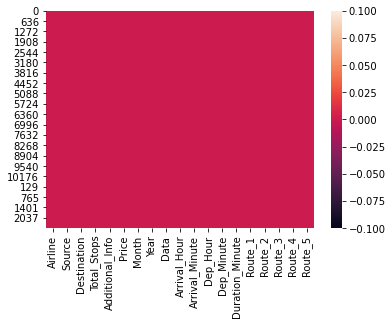

In [68]:
sns.heatmap(big_data.isnull())

In [398]:
big_data["Price"].isnull().sum()

0

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
model =ExtraTreesRegressor()
model.fit(real_x,real_y)

ExtraTreesRegressor()

In [70]:
print(model.feature_importances_)

[0.10981458 0.01246141 0.01368442 0.13746975 0.05614434 0.05088786
 0.         0.16835556 0.03901276 0.02750598 0.04701601 0.03196512
 0.03995071 0.01187899 0.0488722  0.17791807 0.02669486 0.00036736]


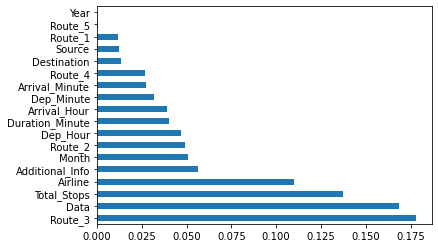

In [71]:
fear_importances =pd.Series(model.feature_importances_,index =real_x.columns)
fear_importances.nlargest(20).plot(kind="barh")
plt.show()

In [72]:
big_data =big_data.drop(["Route_5"],axis =1)
big_data =big_data.drop(["Year"],axis =1)

In [73]:
big_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Data,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_Minute,Route_1,Route_2,Route_3,Route_4
0,3,0,5,0,8,3897.0,3,24,1,10,22,20,50,0,13,24,12
1,1,3,0,2,8,7662.0,5,1,13,15,5,50,25,2,25,1,3
2,4,2,1,2,8,13882.0,6,9,4,25,9,25,0,3,32,4,5
3,3,3,0,1,8,6218.0,5,12,23,30,18,5,25,2,34,3,12
4,3,0,5,1,8,13302.0,3,1,21,35,16,50,45,0,34,8,12


In [74]:
#random Forest Regression

In [88]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y =train_test_split(real_x,real_y,test_size =0.3,random_state =0)

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [91]:
#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [92]:
from sklearn.ensemble import RandomForestRegressor
rf =RandomForestRegressor()
rf_random =RandomizedSearchCV(estimator =rf,param_distributions =random_grid,scoring ="neg_mean_squared_error",n_iter =50,cv=5,verbose =2,random_state =42,n_jobs =1)

In [93]:
rf_random.fit(train_x,train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   4.8s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  10.5s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  10.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  10.5s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  10.8s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  10.5s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   7.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.0s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   9.0s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   9.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   5.3s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   7.5s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   7.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   7.6s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   4.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   4.1s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   5.0s
[CV] n_estimators=900, min_samples_split=

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 23.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [94]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [95]:
rf_random.best_score_

-5261946.74376393

In [97]:
pred_y1 =rf_random.predict(train_x)
pred_y2 =rf_random.predict(test_x)

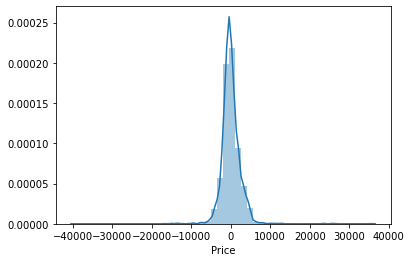

In [98]:
sns.distplot(test_y-pred_y2)

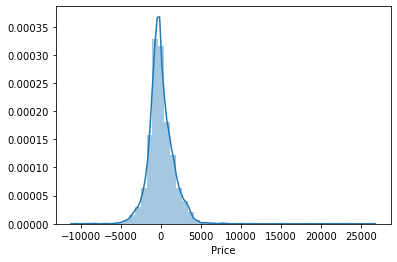

In [100]:
sns.distplot(train_y-pred_y1)

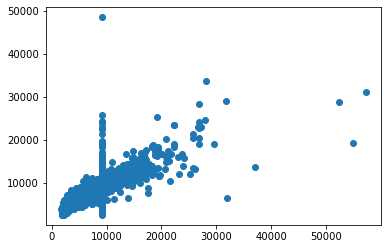

In [101]:
plt.scatter(test_y,pred_y2)

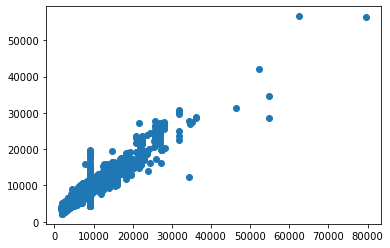

In [102]:
plt.scatter(train_y,pred_y1)

In [103]:
from sklearn import metrics
print("MAE:" ,metrics.mean_absolute_error(test_y,pred_y2))
print("MSE:" ,metrics.mean_squared_error(test_y,pred_y2))
print("RMAE:" ,np.sqrt(metrics.mean_squared_error(test_y,pred_y2)))

MAE: 1579.0719700005377
MSE: 5943998.605064845
RMAE: 2438.0317071492004


In [104]:
from sklearn import metrics
print("MAE:" ,metrics.mean_absolute_error(train_y,pred_y1))
print("MSE:" ,metrics.mean_squared_error(train_y,pred_y1))
print("RMAE:" ,np.sqrt(metrics.mean_squared_error(train_y,pred_y1)))

MAE: 1143.70445800732
MSE: 2655224.7191739143
RMAE: 1629.4860291435193
